In [409]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
import re

In [410]:
# Grab and process the raw data
IMDB_labelled = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
IMDB_labelled.columns = ['message', 'sentiment']

In [411]:
IMDB_labelled.head()

,message,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [412]:
IMDB_labelled['Uppercase'] = IMDB_labelled.message.str.findall(r'[A-Z]').str.len()

In [413]:
IMDB_labelled['exclamation_mark'] = IMDB_labelled.message.str.count('!')

In [414]:
IMDB_labelled['question_mark'] = IMDB_labelled.message.str.count(r'\?')

In [415]:
IMDB_labelled['emoji'] = IMDB_labelled.message.str.count(r':\)')

In [416]:
IMDB_labelled.head()

,message,sentiment,Uppercase,exclamation_mark,question_mark,emoji
0,"A very, very, very slow-moving, aimless movie ...",0,1,0,0,0
1,Not sure who was more lost - the flat characte...,0,1,0,0,0
2,Attempting artiness with black & white and cle...,0,1,0,0,0
3,Very little music or anything to speak of.,0,1,0,0,0
4,The best scene in the movie was when Gerardo i...,1,2,0,0,0


In [417]:
#IMDB_labelled['question_mark'] = IMDB_labelled.message.str.count('?')

In [418]:
#IMDB_labelled['emoji'] = IMDB_labelled.message.str.count(':)' + ';)')

In [419]:
# use a count vectorizer, tokenize the words, 

In [420]:
translator = str.maketrans('', '', string.punctuation)
def process_text(t):
    t = t.translate(translator).lower()
    return t

In [421]:
text_raw_1 = IMDB_labelled
text_raw_1['message'] = text_raw_1.message.apply(lambda x: process_text(x))

In [422]:
text_raw_1 = text_raw_1.dropna()

In [423]:
words = " ".join(text_raw_1.message.values)
words

'a very very very slowmoving aimless movie about a distressed drifting young man   not sure who was more lost  the flat characters or the audience nearly half of whom walked out   attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent   very little music or anything to speak of   the best scene in the movie was when gerardo is trying to find a song that keeps running through his head   the rest of the movie lacks art charm meaning if its about emptiness it works i guess because its empty   wasted two hours   saw the movie today and thought it was a good effort good messages for kids   a bit predictable   loved the casting of jimmy buffet as the science teacher   and those baby owls were adorable   the movie showed a lot of florida at its best made it look very appealing   the songs were the best and the muppets were so hilarious   it was so cool   this is a very

In [424]:
c=Counter(words.split(" "))

In [425]:
feature_list = [item[0] for item in c.items() if item[1] > 3]

In [426]:
for key in feature_list:
    text_raw_1[str(key)] = text_raw_1.message.str.contains(
        ' ' + str(key),
        case=False
    )    

In [427]:
#text_raw_1.head()

### Using a list of positive and negative words

In [428]:
df_positive = pd.read_csv('positive.csv', header=None)
df_positive.columns = ['positive']
positive = df_positive['positive'].tolist()

In [429]:
df_negative = pd.read_csv('negative2.csv', header=None)
df_negative.columns = ['negative']
df_negative['negative'] = df_negative.negative.apply(lambda x: x.translate(translator))
negative = df_negative['negative'].tolist()

In [430]:
# positive = ['good', 'great', 'awesome', 'best', 'cool', 'interesting', '10', 'decent', 'interesting', 'entertaining', 'fan', 'classic', 'love', 'excellent']
# negative = ['poor', 'bad', 'average',  'suck', 'lost', 'overpriced', 'bored', 'slow', 'boring' ]

In [431]:
# freq_text = text_raw_1.message.apply(lambda x: x.split(" "))
# freq_text.sort_values(ascending=False)

In [432]:
for key in positive:
    text_raw_1[str(key)] = text_raw_1.message.str.contains(
        ' ' + str(key),
        case=False
    )

In [433]:
for key in negative:
    text_raw_1[str(key)] = text_raw_1.message.str.contains(
        ' ' + str(key),
        case=False
    )

### Naive Bayes model

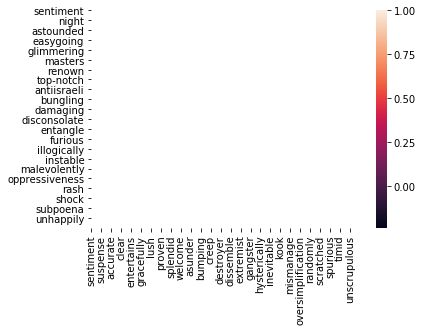

In [53]:
sns.heatmap(text_raw_1.corr())

In [319]:
data = text_raw_1[feature_list + positive]
target = text_raw_1['sentiment']

In [320]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Percentage of correctly labeled points: {}".format(
    1 - (target != y_pred).sum() / data.shape[0]
))

Number of mislabeled points out of a total 748 points : 89
Percentage of correctly labeled points: 0.8810160427807486


In [321]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[338,  24],
       [ 65, 321]], dtype=int64)

### Secondary dataset: Yelp

In [322]:
df_yelp = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
df_yelp.columns = ['message', 'sentiment']

In [323]:
df_yelp['message'] = df_yelp.message.apply(lambda x: process_text(x))

In [324]:
# df_yelp = df_yelp.message.dropna()

In [325]:
words_2 = " ".join(df_yelp.message.values)

In [326]:
d=Counter(words_2.split(" "))
feature_list_yelp = [item[0] for item in d.items() if item[1] > 3]

for key in feature_list_yelp:
    df_yelp[str(key)] = df_yelp.message.str.contains(
        ' ' + str(key),
        case=False
    )    

In [327]:
# for key in positive:
#     df_yelp[str(key)] = df_yelp.message.str.contains(
#         ' ' + str(key),
#         case=False
#     )

In [328]:
for key in negative:
    df_yelp[str(key)] = df_yelp.message.str.contains(
        ' ' + str(key),
        case=False
    )

In [329]:
secondary_data = df_yelp[feature_list_yelp + negative]
secondary_target = df_yelp['sentiment']

In [330]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(secondary_data, secondary_target)
y_pred_2 = bnb.predict(secondary_data)

print("Number of mislabeled points out of a total {} points : {}".format(
    secondary_data.shape[0],
    (secondary_target != y_pred_2).sum()
))

Number of mislabeled points out of a total 1000 points : 133


Interestingly, the features used on the Yelp set were not as effective at reducing mislabeling of points. Also of note, using the positive feature set of words is better for the IMDB dataset. However, the negative feature of words is more useful in reducing mislabeled points in the yelp dataset. 

## Next assignment: create a model and test new features

In [331]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8066666666666666
Testing on Sample: 0.8810160427807486


In [332]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.64473684, 0.72368421, 0.81333333, 0.86666667, 0.78666667,
       0.72      , 0.82432432, 0.72972973, 0.63513514, 0.82432432])

Based on the 10-fold cross validation, this model is not very good given the high variance from the cross validation scores above. Similarly, using the 20% holdout method on the train test split shows pretty different results.  

### Adding new features to improve model on IMDB text data

Features to add:
1. character length
2. % uppercase letters
3. exclamation marks (convert to text string up above)
4. question marks ('   ')
5. emojis ('   ')

### Feature add 1

In [333]:
df_feature_1 = text_raw_1
df_feature_1['char_len'] = df_feature_1.message.apply(len)

In [334]:
data_f1 = df_feature_1[feature_list + positive + ['char_len']]
target_f1 = df_feature_1['sentiment']

In [335]:
bnb.fit(data_f1, target_f1)
y_pred_f1 = bnb.predict(data_f1)

In [336]:
confusion_matrix(target_f1, y_pred_f1)

array([[338,  24],
       [ 65, 321]], dtype=int64)

In [337]:
X_train, X_test, y_train, y_test = train_test_split(data_f1, target_f1, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_f1, target_f1).score(data_f1, target_f1)))

cross_val_score(bnb, data_f1, target_f1, cv=10)

With 20% Holdout: 0.8066666666666666
Testing on Sample: 0.8810160427807486


array([0.64473684, 0.72368421, 0.81333333, 0.86666667, 0.78666667,
       0.72      , 0.82432432, 0.72972973, 0.63513514, 0.82432432])

### Feature add 2

In [338]:
df_feature_2 = text_raw_1

In [339]:
data_f2 = df_feature_2[feature_list + positive + ['Uppercase']]
target_f2 = df_feature_2['sentiment']

In [340]:
bnb.fit(data_f2, target_f2)
y_pred_f2 = bnb.predict(data_f2)

In [341]:
confusion_matrix(target_f2, y_pred_f2)

array([[338,  24],
       [ 64, 322]], dtype=int64)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(data_f2, target_f2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_f2, target_f2).score(data_f2, target_f2)))

cross_val_score(bnb, data_f2, target_f2, cv=10)

With 20% Holdout: 0.8066666666666666
Testing on Sample: 0.8823529411764706


array([0.64473684, 0.72368421, 0.81333333, 0.85333333, 0.78666667,
       0.72      , 0.82432432, 0.71621622, 0.63513514, 0.82432432])

### Feature add 3

In [343]:
df_feature_3 = text_raw_1
data_f3 = df_feature_3[feature_list + positive + ['exclamation_mark']]
target_f3 = df_feature_3['sentiment']

In [344]:
bnb.fit(data_f3, target_f3)
y_pred_f3 = bnb.predict(data_f3)

In [345]:
confusion_matrix(target_f3, y_pred_f3)

array([[338,  24],
       [ 65, 321]], dtype=int64)

In [346]:
X_train, X_test, y_train, y_test = train_test_split(data_f3, target_f3, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_f3, target_f3).score(data_f3, target_f3)))

cross_val_score(bnb, data_f3, target_f3, cv=10)

With 20% Holdout: 0.8066666666666666
Testing on Sample: 0.8810160427807486


array([0.64473684, 0.72368421, 0.81333333, 0.86666667, 0.78666667,
       0.72      , 0.82432432, 0.71621622, 0.63513514, 0.82432432])

### Feature add 4

In [400]:
df_feature_4 = text_raw_1
data_f4 = df_feature_4[feature_list + positive + ['question_mark']]
target_f4 = df_feature_4['sentiment']

In [401]:
bnb.fit(data_f4, target_f4)
y_pred_f4 = bnb.predict(data_f4)

In [402]:
confusion_matrix(target_f4, y_pred_f4)

array([[338,  24],
       [ 64, 322]], dtype=int64)

In [403]:
X_train, X_test, y_train, y_test = train_test_split(data_f4, target_f4, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_f4, target_f4).score(data_f4, target_f4)))

cross_val_score(bnb, data_f4, target_f4, cv=10)

With 20% Holdout: 0.8066666666666666
Testing on Sample: 0.8823529411764706


array([0.63157895, 0.72368421, 0.81333333, 0.86666667, 0.78666667,
       0.72      , 0.82432432, 0.71621622, 0.63513514, 0.82432432])

### Feature add 5

In [434]:
df_feature_5 = text_raw_1
data_f5 = df_feature_5[feature_list + positive + ['emoji']]
target_f5 = df_feature_5['sentiment']

In [435]:
bnb.fit(data_f5, target_f5)
y_pred_f5 = bnb.predict(data_f5)

In [436]:
confusion_matrix(target_f5, y_pred_f5)

array([[338,  24],
       [ 64, 322]], dtype=int64)

In [437]:
X_train, X_test, y_train, y_test = train_test_split(data_f5, target_f5, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_f5, target_f5).score(data_f5, target_f5)))

cross_val_score(bnb, data_f5, target_f5, cv=10)

With 20% Holdout: 0.8066666666666666
Testing on Sample: 0.8823529411764706


array([0.64473684, 0.72368421, 0.81333333, 0.86666667, 0.78666667,
       0.72      , 0.82432432, 0.72972973, 0.63513514, 0.82432432])

### Combining multiple features that worked individually

In [446]:
df_feat_comb = text_raw_1
data_fcomb = df_feat_comb[feature_list + positive + ['emoji'] + ['question_mark'] + ['Uppercase']]
target_fcomb = df_feat_comb['sentiment']

In [447]:
bnb.fit(data_fcomb, target_fcomb)
y_pred_fcomb = bnb.predict(data_fcomb)

In [448]:
confusion_matrix(target_fcomb, y_pred_fcomb)

array([[338,  24],
       [ 63, 323]], dtype=int64)

In [449]:
X_train, X_test, y_train, y_test = train_test_split(data_fcomb, target_fcomb, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_fcomb, target_fcomb).score(data_fcomb, target_fcomb)))

cross_val_score(bnb, data_fcomb, target_fcomb, cv=10)

With 20% Holdout: 0.8066666666666666
Testing on Sample: 0.8836898395721925


array([0.63157895, 0.72368421, 0.81333333, 0.85333333, 0.78666667,
       0.72      , 0.82432432, 0.71621622, 0.63513514, 0.81081081])